# Pitchfork reviews classification

The goal of this notebook is to predict the score of a pitchfork review given its review

In [1]:
%matplotlib notebook
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('reviews.csv')

df.loc[df['artist'] == 'explosions in the sky']

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
977,21686,1396,the wilderness,http://pitchfork.com/reviews/albums/21686-the-...,8.0,0,brandon stosuy,contributor,2016-03-28,0,28,3,2016,21686,Explosions in the Sky are the kind of band tha...,rock,temporary residence,explosions in the sky
6724,15327,9392,"take care, take care, take care",http://pitchfork.com/reviews/albums/15327-take...,7.2,0,joe tangari,contributor,2011-04-25,0,25,4,2011,15327,"Four years ago, Explosions in the Sky ended th...",rock,temporary residence,explosions in the sky
11712,9916,16796,all of a sudden i miss everyone,http://pitchfork.com/reviews/albums/9916-all-o...,6.0,0,brian howe,contributor,2007-02-19,0,19,2,2007,9916,While alphabetized post-rock record collection...,rock,temporary residence,explosions in the sky
13107,2882,19260,the rescue (travels in constants vol. 21),http://pitchfork.com/reviews/albums/2882-the-r...,7.2,0,cory d. byrom,NaN,2005-12-07,2,7,12,2005,2882,Thanks to a series of phenomenal albums and a ...,rock,temporary residence,explosions in the sky
13259,2881,19489,"how strange, innocence",http://pitchfork.com/reviews/albums/2881-how-s...,7.9,0,sam ubl,NaN,2005-10-23,6,23,10,2005,2881,If you wonder why Explosions in the Sky can be...,rock,self-released,explosions in the sky
14394,2880,21123,friday night lights ost,http://pitchfork.com/reviews/albums/2880-frida...,5.5,0,sam ubl,NaN,2004-11-07,6,7,11,2004,2880,"Located amid arid desert sprawl, Odessa, Texas...",rock,hip-o,explosions in the sky
15412,2879,22682,the earth is not a cold dead place,http://pitchfork.com/reviews/albums/2879-the-e...,7.7,0,hartley goldstein,NaN,2003-11-30,6,30,11,2003,2879,When the Texas quartet Explosions in the Sky r...,rock,temporary residence,explosions in the sky
17368,2878,25575,"those who tell the truth shall die, those who ...",http://pitchfork.com/reviews/albums/2878-those...,8.9,0,kevin adickes,NaN,2001-12-18,1,18,12,2001,2878,Most of us spend our lives sleepwalking throug...,rock,temporary residence,explosions in the sky


In [3]:
len(df)

18388

## EDA

## Scores mean

In [4]:
print('Scores mean:', df.score.mean())

Scores mean: 7.0057102458124865


### Scores distribution


{0: 19, 1: 24, 2: 121, 3: 214, 4: 565, 5: 1001, 6: 3172, 7: 5637, 8: 6512, 9: 955, 10: 168}


<IPython.core.display.Javascript object>


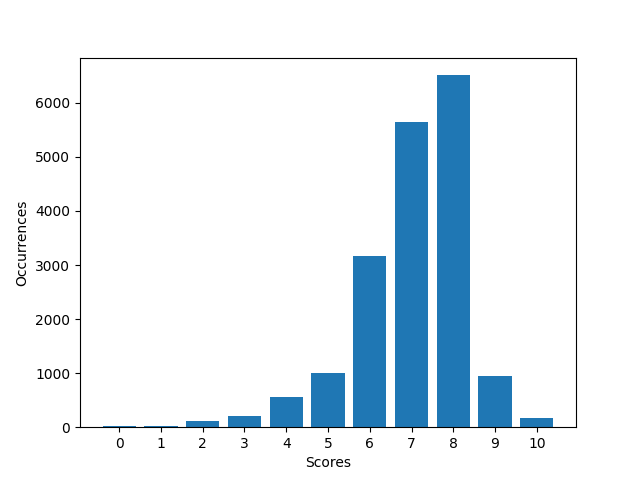

In [5]:
reviews_scores = df.score.apply(np.around).astype(int).sort_values()

freq_scores = dict(Counter(reviews_scores))
print(freq_scores)

n_groups = len(freq_scores)

plt.bar(range(n_groups), list(freq_scores.values()), align='center')
plt.xticks(range(n_groups), list(freq_scores.keys()))
plt.ylabel('Occurrences')
plt.xlabel('Scores')

plt.show()

### Score mean by year

Does the publication year has influence in the score?

In [6]:
df.groupby('pub_year').score.describe()

,count,mean,std,min,25%,50%,75%,max
pub_year,,,,,,,,
1999,223.0,6.869507,1.731521,0.2,5.95,7.2,8.100,10.0
2000,348.0,6.791954,1.785757,0.0,6.00,7.2,7.900,10.0
2001,456.0,7.132675,1.561996,0.4,6.40,7.5,8.125,10.0
2002,923.0,6.822102,1.652950,0.1,6.10,7.2,7.950,10.0
2003,1059.0,6.940510,1.571374,0.0,6.35,7.3,8.000,10.0
2004,1121.0,7.195629,1.307959,0.0,6.80,7.5,8.000,10.0
2005,1186.0,7.045953,1.365236,0.0,6.60,7.3,7.800,10.0
2006,1185.0,6.977975,1.283259,0.0,6.40,7.2,7.800,10.0
2007,1216.0,6.884622,1.367646,0.0,6.20,7.1,7.800,10.0


In [7]:
per_year_means = df.groupby('pub_year').score.mean()

In [23]:
per_year_std = df.groupby('pub_year').score.std()

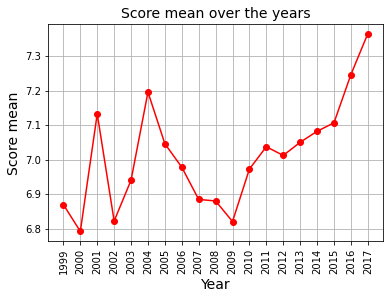

In [31]:
%matplotlib inline

years = per_year_means.index
mean_per_year = per_year_means.values

plt.plot(years, mean_score, color='red', marker='o')

plt.title('Score mean over the years', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score mean', fontsize=14)
plt.xticks(years, rotation=90)
plt.grid(True)
plt.show()

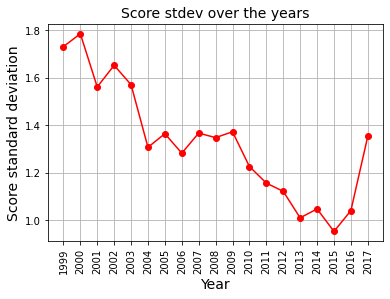

In [29]:
%matplotlib inline

years = per_year_means.index
std_per_year = per_year_std.values

plt.plot(years, std_per_year, color='red', marker='o')

plt.title('Score stdev over the years', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score standard deviation', fontsize=14)
plt.xticks(years, rotation=90)
plt.grid(True)
plt.show()

Apparently, from 2009 to 2017, there is a tendency to score the albums with higher notes (0.5 more points) and from 2009 to 2015, a lower standard deviation of the scores. Does it represent a tendency for more reviews with higher notes over the years?

Let's compare the scores distribution in 2009 with 2015

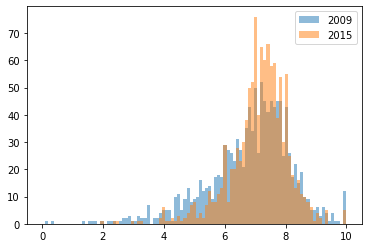

In [54]:
reviews_scores_2009 = df[df.pub_year == 2009].score
reviews_scores_2015 = df[df.pub_year == 2015].score

bins = np.linspace(0, 10, 100)

plt.hist(reviews_scores_2009, bins, alpha=0.5, label='2009')
plt.hist(reviews_scores_2015, bins, alpha=0.5, label='2015')

plt.legend(loc='upper right')
plt.show()

The chart above show that the 2009 scores distribution is similar with the one from 2015, but it is clear that in 2015 we have a significant increase in the number of scores between 6 and 8. So, the publication year of the review indicates a tendency of higher notes given. Because of that, we should consider use this feature to train the model

### Score mean by genre

Does the genre has influence in the score?

In [88]:
df.groupby('genre').score.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
electronic,1994.0,7.068907,1.193844,0.2,6.500,7.3,7.9,10.0
experimental,565.0,7.470796,1.037923,0.5,7.100,7.6,8.0,10.0
folk/country,574.0,7.262892,1.032187,2.7,6.900,7.4,7.9,10.0
global,183.0,7.419672,1.045212,2.2,7.000,7.7,8.1,9.4
jazz,341.0,7.331378,1.265625,1.0,6.900,7.6,8.0,10.0
metal,357.0,7.208683,1.281637,0.2,6.900,7.5,8.0,9.0
pop/r&b,1087.0,6.896228,1.260453,0.0,6.200,7.1,7.7,10.0
rap,1488.0,6.937970,1.255976,0.8,6.375,7.1,7.8,10.0
rock,9435.0,6.941738,1.360477,0.0,6.300,7.2,7.8,10.0


In [89]:
per_genre_means = df.groupby('genre').score.mean()

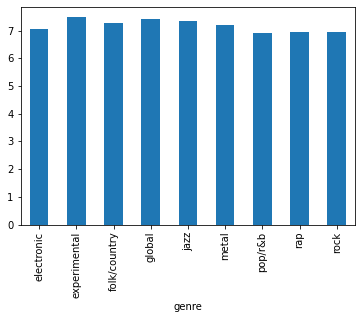

In [90]:
%matplotlib inline

per_genre_means.plot.bar()
plt.show()

The chart above shows that the score has little or no influence from the album genre.

### Score mean by number of reviews

Does an author that reviews more has higher or lower scores?

In [105]:
len(df.author.unique())

432

In [59]:
num_scores_and_mean_by_author = df.groupby('author').score.describe()[["count", "mean"]]

In [60]:
num_scores_and_mean_by_author

,count,mean
author,,
aaron leitko,97.0,7.197938
abby garnett,5.0,7.020000
abigail covington,2.0,7.050000
abigail garnett,4.0,7.175000
adam dlugacz,1.0,6.300000
...,...,...
zach hammerman,1.0,7.500000
zach hooker,26.0,7.300000
zach kelly,153.0,6.601307


In [65]:
num_scores_and_mean_by_author['count']

author
aaron leitko          97.0
abby garnett           5.0
abigail covington      2.0
abigail garnett        4.0
adam dlugacz           1.0
                     ...  
zach hammerman         1.0
zach hooker           26.0
zach kelly           153.0
zach vowell            1.0
zoe camp              69.0
Name: count, Length: 432, dtype: float64

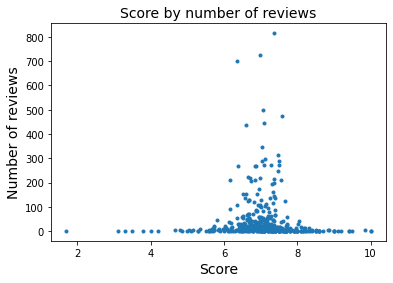

In [72]:
plt.scatter( num_scores_and_mean_by_author['mean'], num_scores_and_mean_by_author['count'], marker='.')
plt.title('Score by number of reviews', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
plt.show()

The chart above indicates that the number of scores given does not have a correlation with the score itself, so there is no use to use this feature in our training.

## Removal of rows without review content

In [14]:
df.isna().sum()

reviewid              0
Unnamed: 0            0
title                 2
url                   0
score                 0
best_new_music        0
author                0
author_type        3904
pub_date              0
pub_weekday           0
pub_day               0
pub_month             0
pub_year              0
reviewid.1            0
content              10
genre              2364
label                47
artist                2
cleaned_content      10
dtype: int64

In [15]:
df = df.dropna(subset=['content'])
df.isna().sum()

reviewid              0
Unnamed: 0            0
title                 2
url                   0
score                 0
best_new_music        0
author                0
author_type        3901
pub_date              0
pub_weekday           0
pub_day               0
pub_month             0
pub_year              0
reviewid.1            0
content               0
genre              2363
label                47
artist                2
cleaned_content       0
dtype: int64

## Preprocessing

In [16]:
def preprocess_text(content):
    # lower case
    cleaned_content = content.str.lower()
    
    #remove punctuation
    cleaned_content = cleaned_content.str.replace('[^\w\s]','')
    
    #remove digits
    cleaned_content = cleaned_content.str.replace('\d+','')
    
    #remove accents
    cleaned_content = cleaned_content.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

    return cleaned_content

df["cleaned_content"] = preprocess_text(df['content'])


/home/joaorobson/Documentos/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/joaorobson/Documentos/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/home/joaorobson/Documentos/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [7]:
df.dtypes


reviewid             int64
Unnamed: 0           int64
title               object
url                 object
score              float64
best_new_music       int64
author              object
author_type         object
pub_date            object
pub_weekday          int64
pub_day              int64
pub_month            int64
pub_year             int64
reviewid.1           int64
content             object
genre               object
label               object
artist              object
cleaned_content     object
dtype: object

# word2vec

Before we train a model to predict the score given the review text, we need transform it in a mathematical object, i.e., a vector with numbers. There are a lot of ways to do that and one used nowadays involve [word embeddings](https://machinelearningmastery.com/what-are-word-embeddings/), which is a technique used to represent words as vectors in a predefined vector space with n dimensions.

word2vec is one of these word embedding strategies. In this problem, we will use a pre-trained word2vec on English language. This pre-trained version can be downloaded [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit).



In [ ]:
from gensim import models

w = models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)

# TSNE

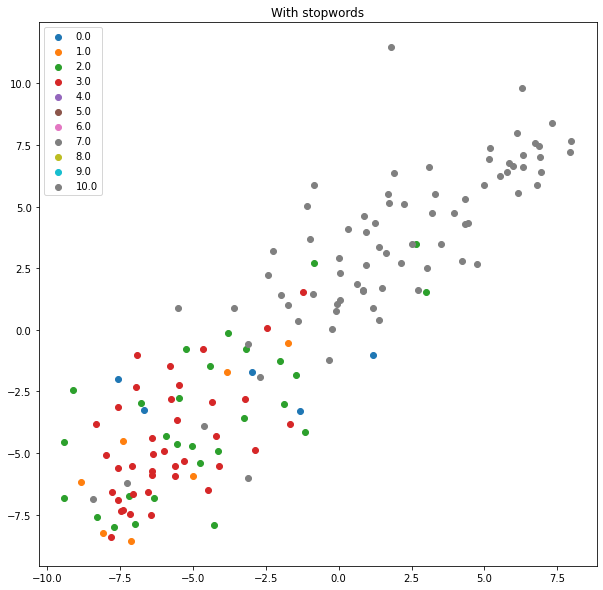

In [17]:
%matplotlib inline

import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer().fit(df[df['score'].isin([0,1,2,3,10])].cleaned_content[:1000])
X = vector.transform(df[df['score'].isin([0,1,2,3,10])].cleaned_content[:1000])

y = df[df['score'].isin([0,1,2,3,10])]['score'].apply(np.around).head(1000)
y = y.values

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X.toarray())
target_ids = range(len((df.score.apply(np.around).unique())))

a = [i for i in df.score.apply(np.around).unique()]
a.sort()
a = list(map(str, a))

colors = 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'gray'

plt.figure(figsize=(10, 10))
for i, c, label in zip(target_ids, colors, tuple(a)):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.title('With stopwords')
plt.legend()
plt.show()


# Vectorization

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)

    return emb

list_corpus = df["cleaned_content"].values
list_labels = df["score"].apply(np.around).astype(int).values
data = cv(list_corpus)

X_train, X_test, y_train, y_test = train_test_split(data, list_labels, test_size=0.2, 
                                                                                random_state=40, stratify=list_labels)


# Classification

## Metrics Calculation

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted',labels=np.unique(y_predicted))             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted',labels=np.unique(y_predicted))
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

## Confusion Matrix Calculation

In [14]:
import pandas as pd

def conf_matrix(y_test, y_pred):
    y_actual = pd.Series(y_test, name='Actual')
    y_pred = pd.Series(y_pred, name='Predicted')
    df_confusion = pd.crosstab(y_actual, y_pred)
    return df_confusion

## Multinomial Naive Bayes

In [159]:
from sklearn.naive_bayes import MultinomialNB

classes_percentages = np.array([list(y_train).count(i)/len(list(y_train)) for i in set(list(y_train))])

mnnb = MultinomialNB(class_prior=classes_percentages).fit(X_train, y_train)

y_pred = mnnb.predict(X_test)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("Multinomial Naive Bayes\n\n")

print("Confusion Matrix\n")

print(conf_matrix(y_test, y_pred))

print("\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

Multinomial Naive Bayes


Confusion Matrix

Predicted   6    7     8
Actual                  
0           1    0     2
1           2    1     2
2           1   12    11
3           6   16    21
4          18   50    45
5          21   94    85
6          28  290   316
7          19  394   714
8           9  284  1009
9           1   20   170
10          0    3    31

accuracy = 0.389, precision = 0.357, recall = 0.389, f1 = 0.374


## Bernoulli Naive Bayes

In [153]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_train, y_train)

y_pred = bnb.predict(X_test)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("Bernoulli Naive Bayes\n\n")

print("Confusion Matrix\n")

print(conf_matrix(y_test, y_pred))

print("\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

Bernoulli Naive Bayes


Confusion Matrix

Predicted  6    7    8  9
Actual                   
0          0    1    2  0
1          1    3    1  0
2          0   14   10  0
3          0   26   17  0
4          3   82   28  0
5          2  151   47  0
6          6  438  189  1
7          2  644  479  2
8          0  398  901  3
9          0   20  167  4
10         0    0   31  3

accuracy = 0.423, precision = 0.420, recall = 0.423, f1 = 0.387


## Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

for c in [0.01, 0.05, 0.25, 0.5, 1, 5, 10, 50]:
    
    clf = LogisticRegression(C=c, class_weight='balanced', solver='liblinear', 
                         multi_class='auto', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

    print("C = %s:\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f"
          % (c, accuracy, precision, recall, f1))
  

C = 0.01:
accuracy = 0.412, precision = 0.401, recall = 0.412, f1 = 0.405
C = 0.05:
accuracy = 0.414, precision = 0.396, recall = 0.414, f1 = 0.404
C = 0.25:
accuracy = 0.409, precision = 0.389, recall = 0.409, f1 = 0.396
C = 0.5:
accuracy = 0.409, precision = 0.386, recall = 0.409, f1 = 0.395
C = 1:
accuracy = 0.406, precision = 0.384, recall = 0.406, f1 = 0.393
C = 5:
accuracy = 0.403, precision = 0.380, recall = 0.403, f1 = 0.390
C = 10:
accuracy = 0.402, precision = 0.380, recall = 0.402, f1 = 0.389
C = 50:
accuracy = 0.400, precision = 0.378, recall = 0.400, f1 = 0.387


## LinearSVC

In [161]:
from sklearn.svm import LinearSVC

svc = LinearSVC().fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("Linear Support Vector Classification\n\n")

print("Confusion Matrix\n")

print(conf_matrix(y_test, y_pred))

print("\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


Linear Support Vector Classification


Confusion Matrix

Predicted  3   4   5    6    7    8   9   10
Actual                                      
0           0   1   1    0    0    1   0   0
1           1   0   1    1    1    0   1   0
2           1   8   4    4    4    1   2   0
3           1   7   4   12    8   11   0   0
4           3   3  13   47   28   15   3   1
5           1   7  31   70   57   30   3   1
6           2  11  36  211  222  138  14   0
7           2  12  22  233  471  378   9   0
8           0   9  15  113  423  699  41   2
9           0   1   3    9   39  111  22   6
10          0   0   0    3    9   10  12   0

accuracy = 0.391, precision = 0.373, recall = 0.391, f1 = 0.382


# Resampling

In [228]:
rows = []
for i in range(0, 11):
    class_row = df[df['rounded_score'] == i]
    class_count = class_row.shape[0]
    if class_count > 1000:
        resampled_row = class_row.sample(1000)
    else:
        resampled_row = class_row.sample(1000, replace=True)

    rows.append(resampled_row)
df_resampled = pd.concat(rows, axis=0)
df_resampled.rounded_score.value_counts()

7     1000
6     1000
5     1000
4     1000
3     1000
10    1000
2     1000
9     1000
1     1000
8     1000
0     1000
Name: rounded_score, dtype: int64

## Split resampled dataset

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)

    return emb

list_corpus_rs = df_resampled["cleaned_content"].values
list_labels_rs = df_resampled["rounded_score"]
data_rs = cv(list_corpus_rs)

X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(data_rs, list_labels_rs, test_size=0.2,random_state=40, shuffle=True)


## Bernoulli Naive Bayes

In [229]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_rs_train, y_rs_train)

y_pred = bnb.predict(X_rs_test)

accuracy, precision, recall, f1 = get_metrics(y_rs_test, y_pred)

print("Bernoulli Naive Bayes\n\n")

print("\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

Bernoulli Naive Bayes



accuracy = 0.722, precision = 0.751, recall = 0.722, f1 = 0.726


## Cross validation of Naive Bayes

In [230]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bnb, X_rs_train, y_rs_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.71 (+/- 0.02)


In [231]:
from sklearn.linear_model import LogisticRegression

for c in [0.01, 0.05, 0.25, 0.5, 1, 5, 10, 50]:
    
    clf = LogisticRegression(C=c, class_weight='balanced', solver='liblinear', 
                         multi_class='auto', random_state=42)
    clf.fit(X_rs_train, y_rs_train)
    y_pred = clf.predict(X_rs_test)
    accuracy, precision, recall, f1 = get_metrics(y_rs_test, y_pred)

    print("C = %s:\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f"
          % (c, accuracy, precision, recall, f1))
  

C = 0.01:
accuracy = 0.734, precision = 0.724, recall = 0.734, f1 = 0.728
C = 0.05:
accuracy = 0.739, precision = 0.733, recall = 0.739, f1 = 0.736
C = 0.25:
accuracy = 0.738, precision = 0.734, recall = 0.738, f1 = 0.736
C = 0.5:
accuracy = 0.740, precision = 0.735, recall = 0.740, f1 = 0.737
C = 1:
accuracy = 0.740, precision = 0.735, recall = 0.740, f1 = 0.737
C = 5:
accuracy = 0.738, precision = 0.733, recall = 0.738, f1 = 0.735
C = 10:
accuracy = 0.738, precision = 0.733, recall = 0.738, f1 = 0.736
C = 50:
accuracy = 0.740, precision = 0.735, recall = 0.740, f1 = 0.737


## Cross validation of Logistic Regression

In [232]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_rs_train, y_rs_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.72 (+/- 0.02)


In [236]:
from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter=2000).fit(X_rs_train, y_rs_train)

y_pred = svc.predict(X_rs_test)

accuracy, precision, recall, f1 = get_metrics(y_rs_test, y_pred)

print("Linear Support Vector Classification\n\n")

print("\naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


Linear Support Vector Classification



accuracy = 0.735, precision = 0.728, recall = 0.735, f1 = 0.731
